In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time as time

def plot_probs (dicecombos):
    
    ax = plt.figure(figsize=[8,8]).gca()
    sum_combos = []
    prob_combos = []
    
    for diesides in dicecombos:

        numdice = len(diesides)
        sumsides = sum(diesides)

        dist = np.zeros(diesides[0])+1
        for i in range(1,len(diesides)):

            die = np.zeros(diesides[i])+1
            prevdist = dist
            dist = np.convolve(die,prevdist)
        
        sums, probs = np.arange(numdice,sumsides+1),dist*100/sum(dist)
        sum_combos.append(sums)
        prob_combos.append(probs)
        
        plt.fill_between(sums, probs,alpha=0.35,label='_nolegend_')
        plt.plot(sums, probs,alpha=1,lw=3)
        
    lowestrole = min([len(diesides) for diesides in dicecombos])
    highestrole = max([sum(diesides) for diesides in dicecombos])
    plt.ylim(0,None)
    plt.xlim(lowestrole,highestrole)
    plt.yticks(size=16)
    plt.xticks(size=16)
    plt.ylabel('Probability (%)',size=16)
    plt.xlabel('Sum of rolls',size=16)
    plt.title('Chance of getting each roll',size=16)
    plt.grid()
    plt.legend([str(diesides)[1:-1] for diesides in dicecombos],fontsize='x-large',bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()
    return sum_combos, prob_combos

### Summary

The goal of this program is to calculate the probability that an arbitrary combination of rolled dice will sum to a particular value.

Each combination is represented as a unique list, where the number of sides of the dice are listed in any order.

For instance:

    • a single d20 would be represented as [20]
    • a flip of a coin (d2) would be represented as [2]
    • rolling 3 d6's would be represented as [6,6,6]
    • rolling 3 d8's would be represented as [8,8,8]
    • rolling 3 d6's and 3 d8's would be represented as [6,6,6,8,8,8]
    
To illustrate the basic usage, let's plot the probability distributions for each of the 6 main dice in a typical DnD campaign.

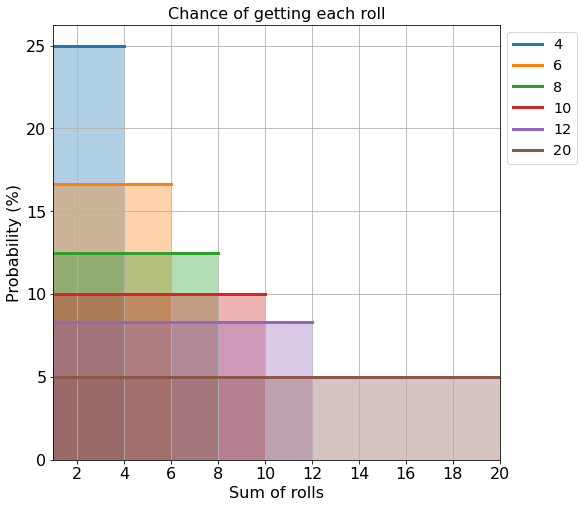

In [3]:
dicecombos = [
        [4],
        [6],
        [8],
        [10],
        [12],
        [20],
        ]
sums, probs = plot_probs(dicecombos)

These uniform distributions pass the sanity check, as each side of each die is equally likely and the highest possible value matches the number of sides of each die.

### Mixing dice

Below is a list of all possible ways to sum up to 20 with a combination of d4, d6, d8, d10, d12, and d20.

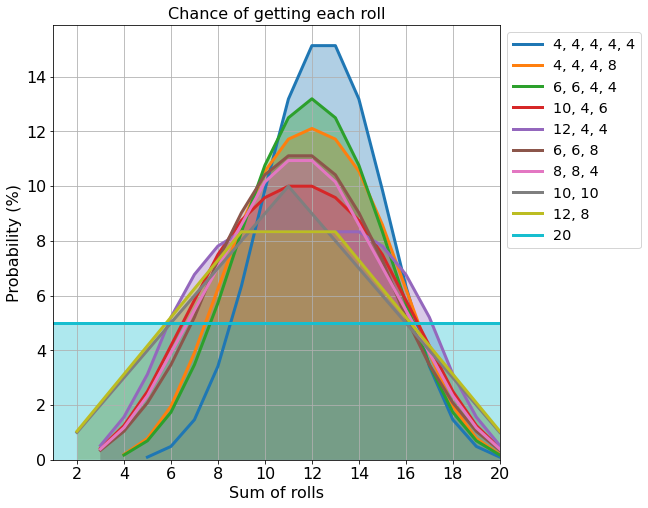

In [4]:
dicecombos = [
        [4,4,4,4,4],
        [4,4,4,8],
        [6,6,4,4],
        [10,4,6],
        [12,4,4],
        [6,6,8],
        [8,8,4],
        [10,10],
        [12,8],
        [20]
        ]

sums, probs = plot_probs(dicecombos)

#### Rolling 5 d4's is a very different thing than rolling one d20.

Despite the fact that all of these combinations sum up to a maximum roll of 20, the distribution of vlaues can be very different.

In particular, the probability of rolling less than 5 with a d20 is 20%, whereas with 5 d4's it's 0%. Similarly, your chance of rolling a 20 with a d20 is 1 in 20, whereas with 5 d4's it's 1 in 1024.

### Try your own combinations
Try the distributions for 2 d6's. If you check these values with the odds ratios on the casino floor, you might convince yourself not to play craps

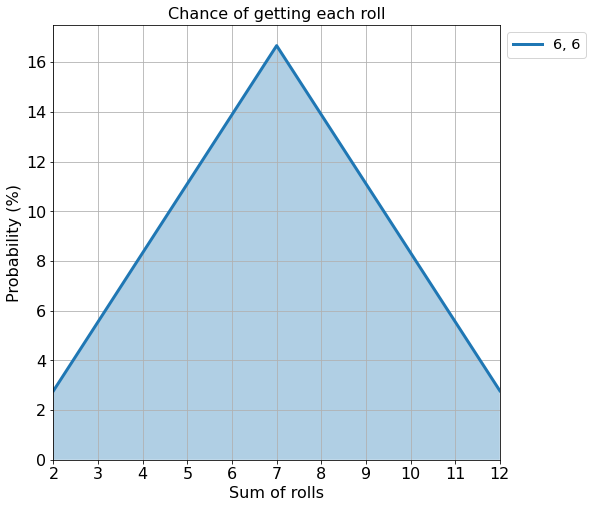

In [5]:
sums, probs = plot_probs(
            [[6,6]]
            )

Or take a look at the case of rolling one of each of the standard 6 dice found in tabletop games compared to other ways of adding up to 60.

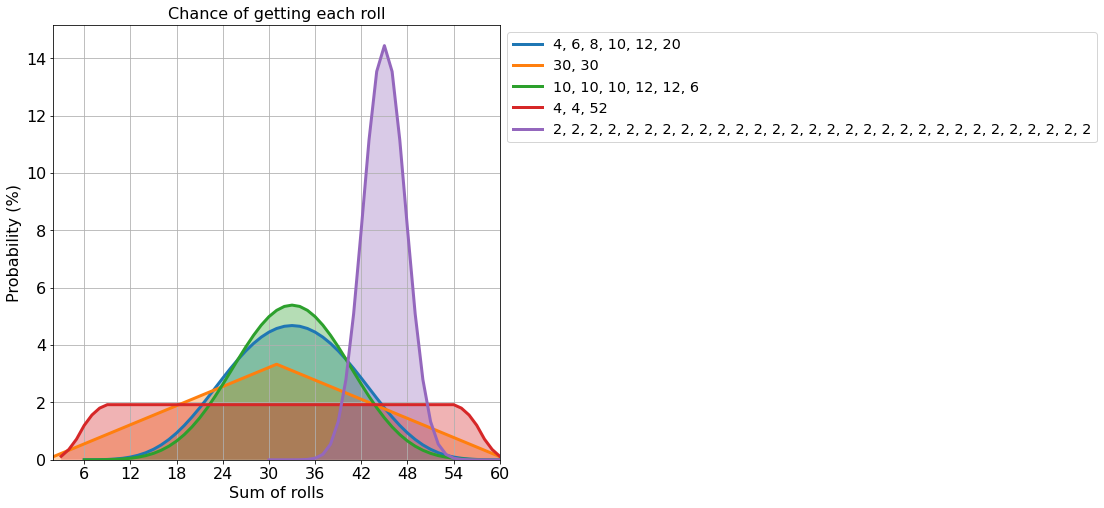

In [6]:
dicecombos = [
        [4,6,8,10,12,20],
    [30,30],
    [10]*3+[12]*2+[6],
    [4,4,52],
    [2]*30
        ]

sums, probs = plot_probs(dicecombos)

## General observations

#### The minumum value you can roll equals the number of dice rolled
This is obvious, but can be easy to lose track of. It comes from the fact that each die gives a value of 1 at minimum. If you roll one d20, you can get a value of 1, but if you roll 2 d10's you get at least a 2. If you roll 5 d4's you get a 5 at minumum, etc.

#### Relatedly, given a fixed maximum value, each additional die increases the average roll by 0.5

#### Given a fixed maximum value, more dice generally leads to a sharper probability distribution
Adding more dice leads to more combinations that give middle values, and less that give extreme values. This is not always the case, particularly if there are many small dice and one large (see point below).

#### When using the same number of dice with a fixed maximum value, the more variation in dice, the more spread out the probability distribution is
For example, 2 d10's will yield a sharper distribution than a d12 and d8. 

## Appendix

### Cumulative probabilities
Sometimes it's more useful to look at the cumulative probability (i.e., what are the chances, I roll at least x). 

The code below that converts the probabilities stored in the variable *probs* to a cumulative probability.

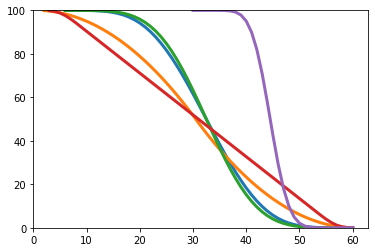

In [7]:
for (roll,prob) in zip(sums,probs):
    plt.plot(roll, 100-np.cumsum(prob),lw=3)
plt.xlim(0,None)
plt.ylim(0,100)
plt.show()

### Validating with simulation

The program above calculates these distributions analytically.

Another, more straighforward way to observe these distributions would be to just empirically roll dice and see what happens. This takes a lot longer to become accurate and will always give an inexact solution, but it's good to compare against our analytical solution to make sure we are in fact getting the solution that we want.

Below is a simple simulator that rolls the dice a number of times and then plots their distribution on top of the analytical soltion.
Each method of calculating is timed so you can see how much longer it takes to get good estimates with either methods.

Personally, I don't have the clever [**d120**](https://www.wired.com/2016/05/mathematical-challenge-of-designing-the-worlds-most-complex-120-sided-dice/), let alone 4 of them, but you do, then you can expect your rolls to match the following distribution:

Solving analytically took	 2.594 ms
Simulating 100000 rolls took	 1267.565 ms


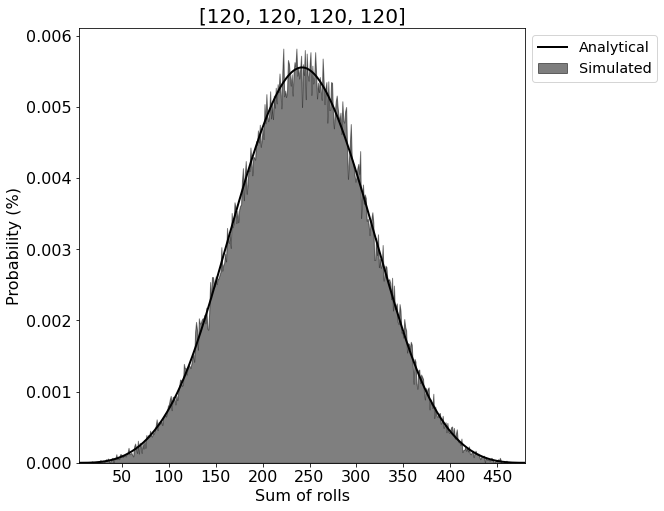

In [8]:
# List of dice you want to roll together
diesides = [120,120,120,120]
# Number of samples the rolling simulator will calculate
n_rolls = 1e5
    
ax = plt.figure(figsize=[8,8]).gca()
numdice = len(diesides)
sumsides = sum(diesides)
sumlist = []

t1=time.time()
dist = np.zeros(diesides[0])+1
for i in range(1,len(diesides)):

    die = np.zeros(diesides[i])+1
    prevdist = dist
    dist = np.convolve(die,prevdist)
plt.plot(range(numdice,sumsides+1),dist/sum(dist),alpha=1,c='k',lw=2)
print('Solving analytically took\t',round((time.time()-t1)*1e3,3),'ms')

t0=time.time()
for i in range(int(n_rolls+1)):
    diesum = sum([np.random.randint(1,high=dice+1) for dice in diesides])
    sumlist.append(diesum)
print('Simulating',i,'rolls took\t',round((time.time()-t0)*1e3,3),'ms')
h,bins,p = plt.hist(sumlist,bins=range(numdice,sumsides+2),density=1,alpha=0.)
plt.fill_between(bins[:-1],h,alpha=0.5,color='k')

plt.legend(['Analytical','Simulated'],fontsize='x-large',bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
lowestrole, highestrole = len(diesides), sum(diesides)
plt.title(diesides,size=20)
plt.xlim(lowestrole,highestrole)
plt.yticks(size=16); plt.xticks(size=16); ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Probability (%)',size=16)
plt.xlabel('Sum of rolls',size=16)
plt.show()
